## Loading Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

## Reading the Dataset using Pandas

In [2]:
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

use=list(np.arange(len(col)))

#read the data from csv
df_air=pd.read_csv('AirQuality_UCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## Printing Last rows

In [3]:
#See the end records of dataframe
df_air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Listing type of columns

In [4]:
df_air.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

## Droping  NAN values

In [5]:
#drop end rows with NaN values
df_air.dropna(how='all',inplace=True)
#drop RH NAN rows
df_air.dropna(thresh=10,axis=0,inplace=True)

## Size of DataFrame (rows,columns)

In [6]:
df_air.shape

(8991, 15)

## Dataframe desciption

In [7]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## Extracting Hour from Time column

In [8]:
df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

## Printing the missing values

In [9]:
print('Count of missing values:\n',df_air.shape[0]-df_air.count())

Count of missing values:
 DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


## Changing the type of DATE from object to datetime format

In [10]:
df_air['DATE']=pd.to_datetime(df_air.DATE, format='%m/%d/%Y')   #Format date column

## Setting DATE column as Index for Dataframe

In [11]:
df_air.set_index('DATE',inplace=True)

## Creating month column using DATE

In [12]:
df_air['MONTH']=df_air.index.month     #Create month column (Run once)
df_air.reset_index(inplace=True)

## Dropping Column NMHC_GT

In [13]:
df_air.drop('NMHC_GT',axis=1,inplace=True)    #drop col

## Filling missing values using mean 

In [14]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [15]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


In [16]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

## Heatmap to show correlation between columns

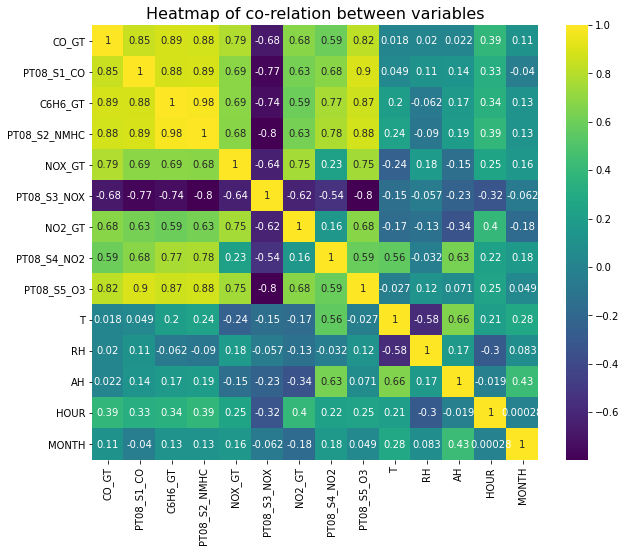

In [17]:
sns.heatmap(df_air.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

## Lineplot between RH(relative humidity) and all other columns

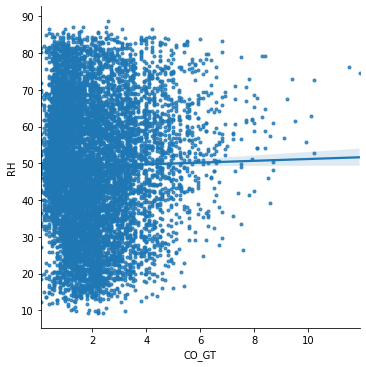

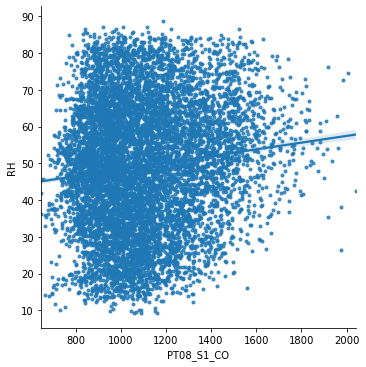

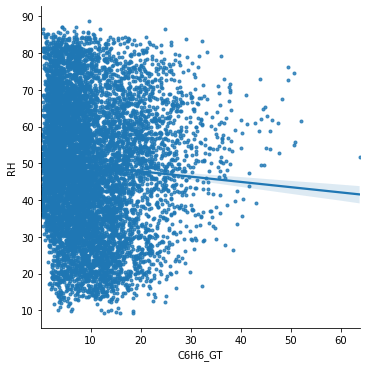

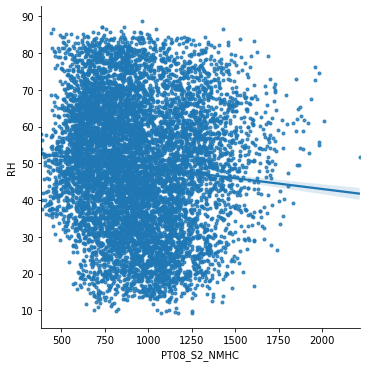

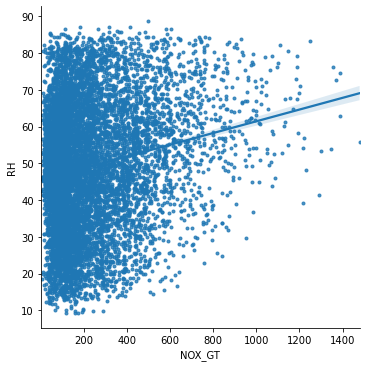

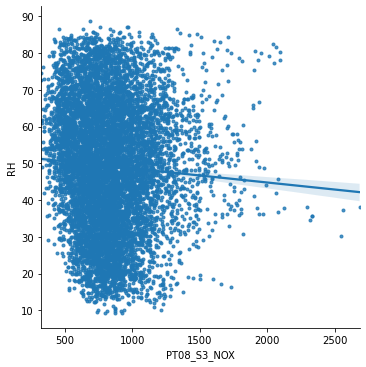

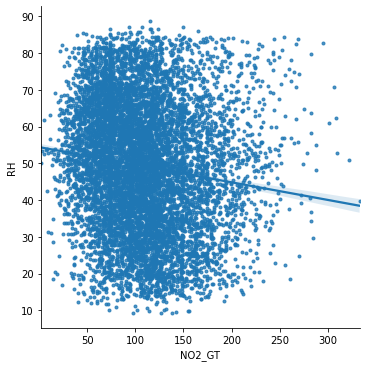

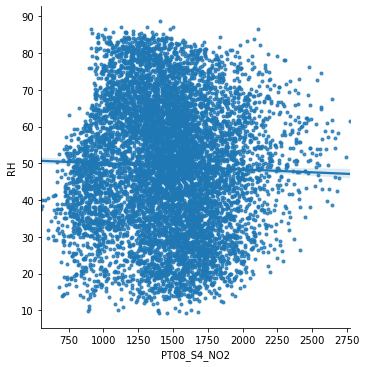

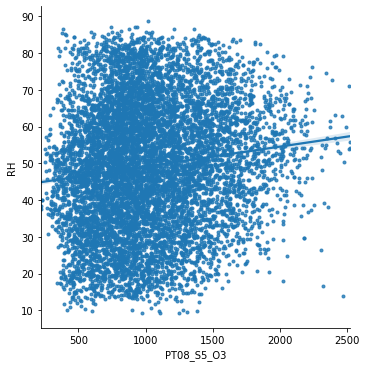

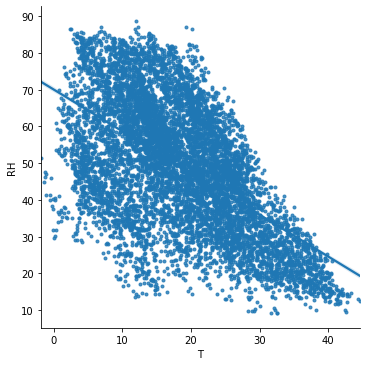

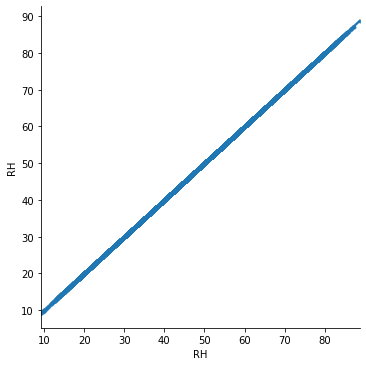

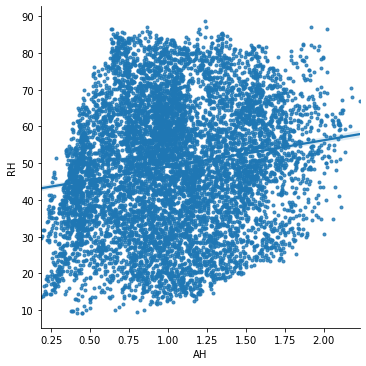

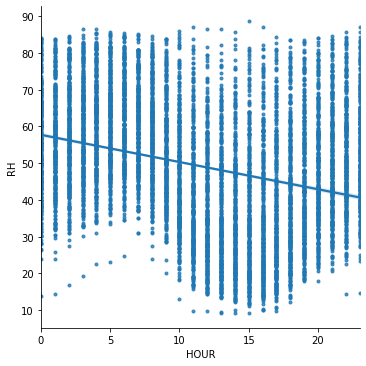

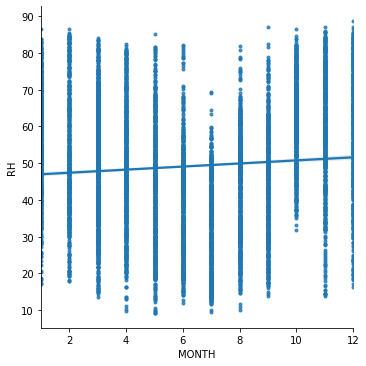

In [18]:
col_=df_air.columns.tolist()[2:]
for i in df_air.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df_air,markers='.')

## Creating Model - LinearRegression

In [19]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

## X = all columns except RH and y = RH

In [20]:
X=df_air[col_].drop('RH',1)     #X-input features
y=df_air['RH']                    #y-input features

## StandardScalar to standardize values range 0-1

In [21]:
ss=StandardScaler()     #initiatilise

In [22]:
X_std=ss.fit_transform(X)     #apply stardardisation

## Spliting Data test = 70% and train = 30%

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

In [24]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6293, 13)
Test data size: (2698, 13)


## Applying LinearRegression model

In [25]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [26]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 49.21763046095795
--------------------------------
Slope:


[('CO_GT', -1.7367447259994806),
 ('PT08_S1_CO', 3.4037741865264355),
 ('C6H6_GT', -5.697492496373159),
 ('PT08_S2_NMHC', -1.196234248325733),
 ('NOX_GT', 3.503689967134083),
 ('PT08_S3_NOX', -0.7001846893676611),
 ('NO2_GT', -1.1080890551814233),
 ('PT08_S4_NO2', 6.877135083115153),
 ('PT08_S5_O3', -1.2881546341603776),
 ('T', -20.184910618985874),
 ('AH', 12.063387650671062),
 ('HOUR', -0.6178414096506839),
 ('MONTH', 1.339928337474743)]

## Calculating Root Mean Square Error in LR

In [27]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 6.01289437121927


In [28]:
def train_test_RMSE(feature):
    X=df_air[feature]
    y=df_air['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [29]:
col_.remove('RH')        #remove output

In [30]:
print('List of features:',col_)    #print list of features

List of features: ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR', 'MONTH']


In [31]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
print('-------------------------')
print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))
print('-------------------------')
print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
print('-------------------------')
print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
print('-------------------------')
print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['CO_GT', 'PT08_S1_CO'] 17.10722324985973
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX'] 14.787924479855858
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3'] 12.875243451046265
-------------------------
RMSE with Features as ['PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT'] 13.364102349517681
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH'] 6.096537988670567
-------------------------
RMSE with Features as ['PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR'] 6.071109936275443
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 

## Model - DecisionTree

In [32]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

In [33]:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

## Calculating Root Mean Square Error in DecisionTree

In [34]:
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.380308675096651


## Model - RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

In [36]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

## Calculating Root Mean Square Error in RandomForestRegressor

In [37]:
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.7136808132404482


## GridSearch

In [38]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [39]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters

In [40]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict

## Calculating Root Mean Square Error in GridSearch

In [41]:
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

RMSE using RF grid search method 2.0096795983062385


## Model - SVM

In [42]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR()

In [ ]:
sv_model=sv_reg.fit(X_train,y_train)    #train the model

In [ ]:
y_pred_sv=sv_model.predict(X_test)         #predict

## Calculating Root Mean Square Error in SVM

In [ ]:
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))